In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd '/content/drive/MyDrive/LDS0_K271_NGUYENMINHQUANG/Project3/'

/content/drive/MyDrive/LDS0_K271_NGUYENMINHQUANG/Project3


In [ ]:
!pip install pandas-profiling==2.7.1

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas_profiling as pp

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [ ]:
pd.options.display.float_format = '{:.2f}'.format

# <font color='F00FF'>Đọc dữ liệu</font>

In [ ]:
reviews = pd.read_csv('Reviews.csv', lineterminator='\n')

In [ ]:
products = pd.read_csv('Products.csv')

# <font color='F00FF'>Product</font>

In [ ]:
pp.ProfileReport(products)

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
products.head(2)

item_id  ...                                              image
0  48102821  ...  https://salt.tikicdn.com/cache/280x280/ts/prod...
1  52333193  ...  https://salt.tikicdn.com/cache/280x280/ts/prod...

[2 rows x 10 columns]

In [ ]:
# Số lượng sản phẩm
print('Số lượng sản phẩm:', products.shape[0])

Số lượng sản phẩm: 4373


In [ ]:
# Kiểu dữ liệu
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4373 entries, 0 to 4372
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   item_id      4373 non-null   int64  
 1   name         4373 non-null   object 
 2   description  4370 non-null   object 
 3   rating       4373 non-null   float64
 4   price        4373 non-null   int64  
 5   list_price   4373 non-null   int64  
 6   brand        4373 non-null   object 
 7   group        4373 non-null   object 
 8   url          4373 non-null   object 
 9   image        4373 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 341.8+ KB


In [ ]:
products[['price', 'list_price']].describe().T

count       mean        std  ...       50%        75%         max
price      4373.00 2763501.13 5544076.83  ... 487000.00 2680000.00 62690000.00
list_price 4373.00 3893684.92 7900791.25  ... 790000.00 3590000.00 82990000.00

[2 rows x 8 columns]

▶ Nhận xét:
- rating dao động trong khoảng từ 0 đến 5
- Khoảng giá giao động rất rộng từ 7000.00 đến 62690000.00

## <font color='orange'>Giá</font>

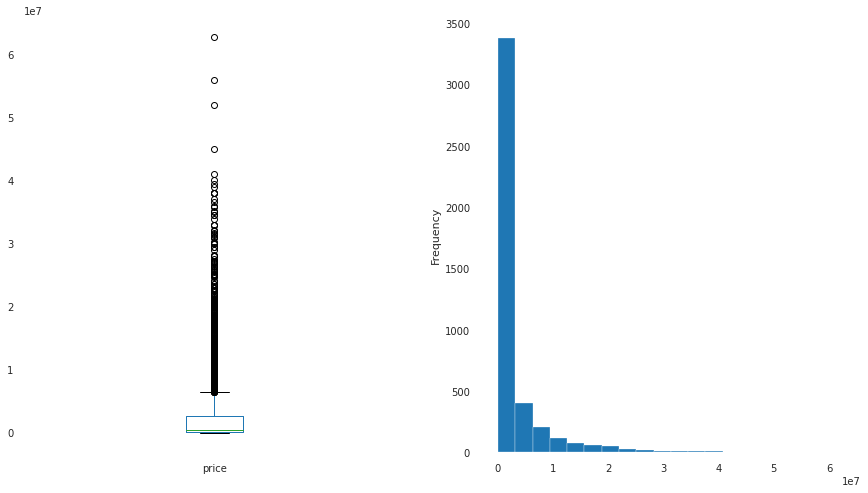

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (15,8))
products.price.plot(kind = 'box', ax = ax[0])
products.price.plot(kind = 'hist', bins = 20, ax = ax[1])
plt.show()

▶ Nhận xét:
- Khoảng giá của sản phẩm giao động rất rộng từ 7000.00 đến 62690000.00
- Phần lớn giá của sản phẩm đều tập trung < 3000000.00

## <font color='orange'>Thương hiệu</font>

In [ ]:
# Sản phẩm theo thương hiệu
brands = products.groupby('brand')['item_id'].count().sort_values(ascending=False)
brands

brand
OEM          1115
Samsung       199
Panasonic      96
LG             96
Sony           95
             ... 
Klink           1
Kplus           1
LB-LINK         1
LBLink          1
\tOEM           1
Name: item_id, Length: 521, dtype: int64

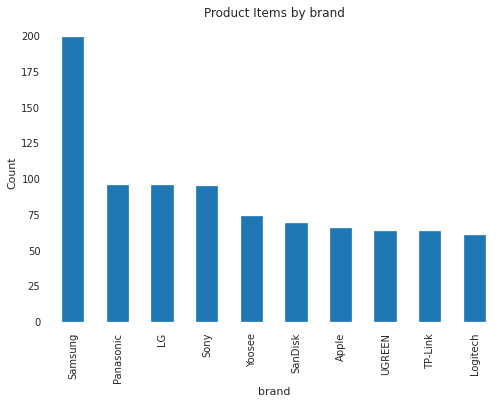

In [ ]:
# Top 10 thương hiệu có số lượng mã sản phẩm cao nhất
brands[1:11].plot(kind='bar')
plt.ylabel('Count')
plt.title('Product Items by brand')
plt.show()

▶ Nhận xét:
- Sản phẩm có thương hiệu Samsung chiếm phần lớn.
- Các thương hiệu còn lại có số lượng tương đương nhau.

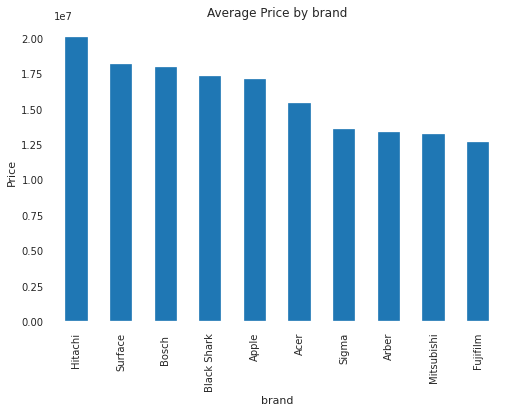

In [ ]:
# Giá bán theo thương hiệu
price_by_brand = products.groupby(by='brand').mean()['price']
price_by_brand.sort_values(ascending=False)[:10].plot(kind='bar')
plt.ylabel('Price')
plt.title('Average Price by brand')
plt.show()

▶ Nhận xét:
- Hitachi là thưng hiệu có giá bán trung bình cao nhất.

## <font color='orange'>**Rating**</font>

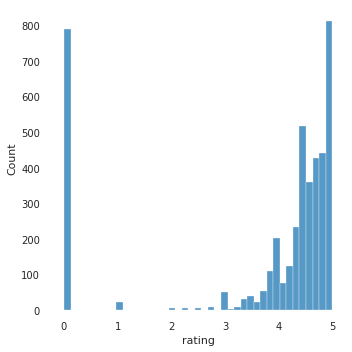

In [ ]:
sns.displot(products, x='rating', kind='hist')
plt.show()

▶ Nhận xét:
- Sản phẩm có rating 0 và 5 cao nhất.
- Phần lớn sán phẩm có rating > 4

In [ ]:
# Nhóm và xem xét rating trong dataset product
products.groupby(['rating'])['item_id'].count()

rating
0.00    790
1.00     24
1.30      2
1.80      1
2.00      7
2.10      1
2.20      2
2.30      4
2.50      7
2.60      1
2.70      6
2.80      4
3.00     52
3.10      5
3.20      9
3.30     17
3.40     15
3.50     40
3.60     23
3.70     54
3.80     61
3.90     49
4.00    204
4.10     77
4.20    125
4.30    233
4.40    191
4.50    326
4.60    361
4.70    427
4.80    442
4.90    220
5.00    593
Name: item_id, dtype: int64

Xem xét product rating trong review của khác hàng

In [ ]:
avg_price_customer = reviews.groupby(by='product_id').mean()['rating'].to_frame().reset_index()
avg_price_customer.rename({'rating':'avg_rating'}, axis=1, inplace=True)
avg_price_customer.head()

product_id  avg_rating
0       54665        4.60
1       55897        4.63
2      104180        4.48
3      116897        4.24
4      122012        4.49

In [ ]:
products = products.merge(avg_price_customer, left_on='item_id', right_on='product_id', how='left')

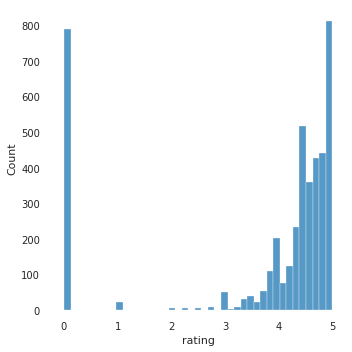

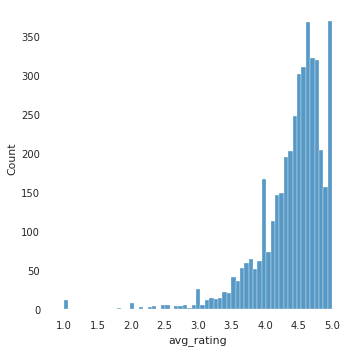

In [ ]:
sns.displot(products, x='rating', kind='hist')
sns.displot(products, x='avg_rating', kind='hist')
plt.show()

▶ Nhận xét:
- Rating của sản phẩm trong review của khách hàng > 0.
- Có thể kết luận điểm rating =0 trong product là do thiếu dữ liệu.

# <font color='F00FF'>Review</font>

In [ ]:
pp.ProfileReport(reviews)

Summarize dataset:   0%|          | 0/19 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
reviews.head()

id  ...                                            content
0   0  ...  Lúcđầu quên thông tin nên dùng 512gb thì ko đc...
1   1  ...  Tiki giao hàng nhanh. Sản phẩm đúng như mô tả,...
2   2  ...  chất lượng camera rõ nét, chống mưa nắng tuyệt...
3   3  ...  Hàng được đóng gói cẩn thận, giao hàng nhanh ,...
4   4  ...  dễ cài đặt, chất lượng tốt, chế độ xem hồng ng...

[5 rows x 7 columns]

In [ ]:
# Số lượng sản phẩm
print('Số lượng sản phẩm:', reviews.shape[0])

Số lượng sản phẩm: 361090


In [ ]:
# Kiểu dữ liệu
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361090 entries, 0 to 361089
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           361090 non-null  int64 
 1   customer_id  361090 non-null  int64 
 2   product_id   361090 non-null  int64 
 3   name         360662 non-null  object
 4   rating       361090 non-null  int64 
 5   title        361062 non-null  object
 6   content      165053 non-null  object
dtypes: int64(4), object(3)
memory usage: 19.3+ MB


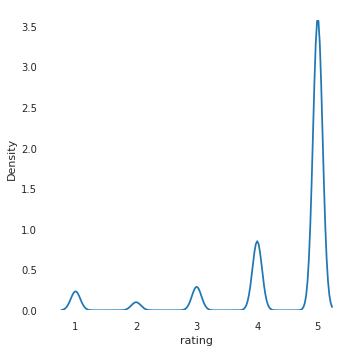

In [ ]:
sns.displot(reviews, x='rating', kind='kde')
plt.show()

▶ Nhận xét:
- Phần lớn khác hàng phản hồi tích cực về sản phẩm.
- Sản phẩm có chất lương tốt hoặc khách hàng dễ tính.

In [ ]:
reviews.groupby(['rating']).size()

rating
1     16616
2      7098
3     20600
4     60565
5    256211
dtype: int64

▶ Nhận xét:
- Phần lớn đánh giá rating là 5

## <font color='orange'>**Top 20 sản phẩm được đánh giá nhiều nhất**</font>

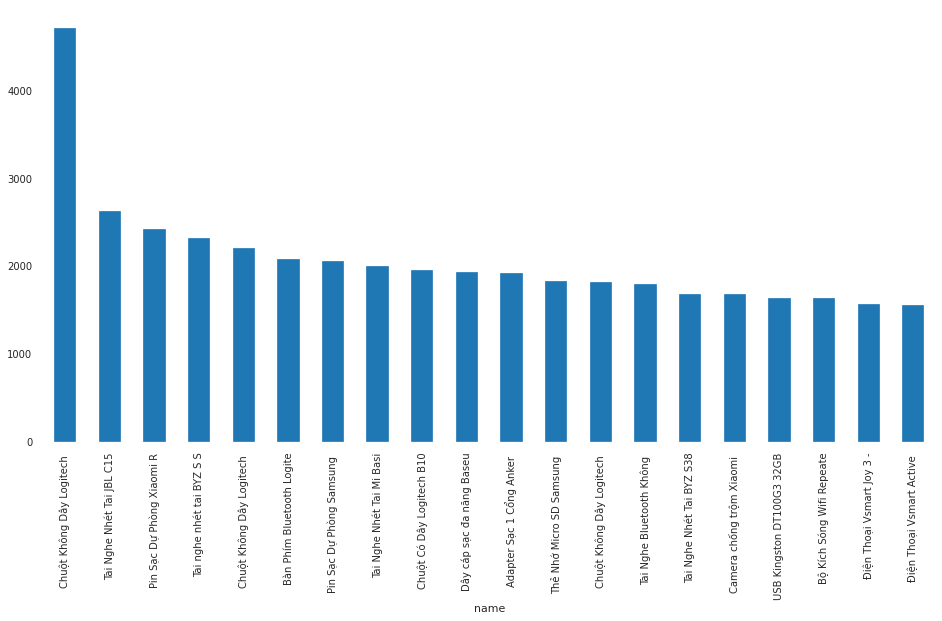

In [ ]:
plt.figure(figsize=(16,8))
top_products = reviews.groupby('product_id').count()['customer_id'].sort_values(ascending=False)[:20]
top_products.index = products[products.item_id.isin(top_products.index)]['name'].str[:25]
top_products.plot(kind='bar')
plt.show()

▶ Nhận xét:
- Phụ kiện điện thoại máy tính.
- Chuột không dây Logitech được đánh giá nhiều nhất

## <font color='orange'>**Top 20 khách hàng thực hiện đánh giá nhiều nhất**</font>

In [ ]:
# Top 20 customer thực hiện đánh giá nhiều nhất
top_rating_customers = reviews.groupby('customer_id').count()['product_id'].sort_values(ascending=False)[:20]

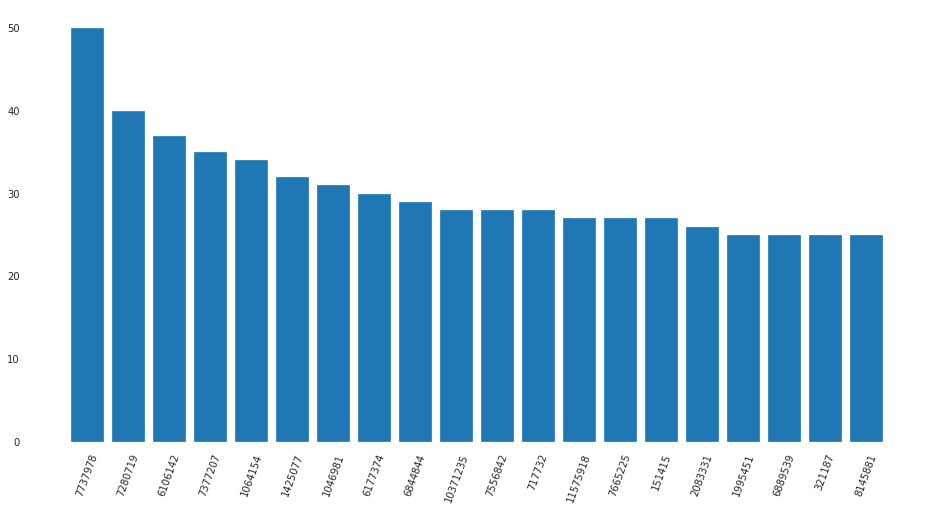

In [ ]:
plt.figure(figsize=(16,8))
plt.bar(x=[str(x) for x in top_rating_customers.index], height=top_rating_customers.values)
plt.xticks(rotation=70)
plt.show()